# 시각화
subplot으로 각 행정구역별로 나누고 시군구별 도서관 1관당 인구 수

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font', family = 'Malgun Gothic') # 한글 안깨지게

In [25]:
library_population_per_population = pd.read_csv('library_population_per_population.csv', encoding='cp949')
library_population_per_population

,행정구역,시군구,도서관수,장서수,2025년06월_계_총인구수,도서관 개당 인구수
0,강원,강릉시,18,580837,206904.0,11494.666667
1,강원,고성군,13,179227,26812.0,2062.461538
2,강원,동해시,24,497645,86854.0,3618.916667
3,강원,삼척시,14,379608,61311.0,4379.357143
4,강원,속초시,10,319419,80101.0,8010.100000
...,...,...,...,...,...,...
225,충북,제천시,26,754444,128437.0,4939.884615
226,충북,증평군,17,172001,37181.0,2187.117647
227,충북,진천군,19,341965,85991.0,4525.842105
228,충북,청주시,131,2799459,855340.0,6529.312977


In [5]:
# 평균 도서관 개당 인구수

mean_value = library_population_per_population['도서관 개당 인구수'].mean()
print(mean_value)

6128.253026579484


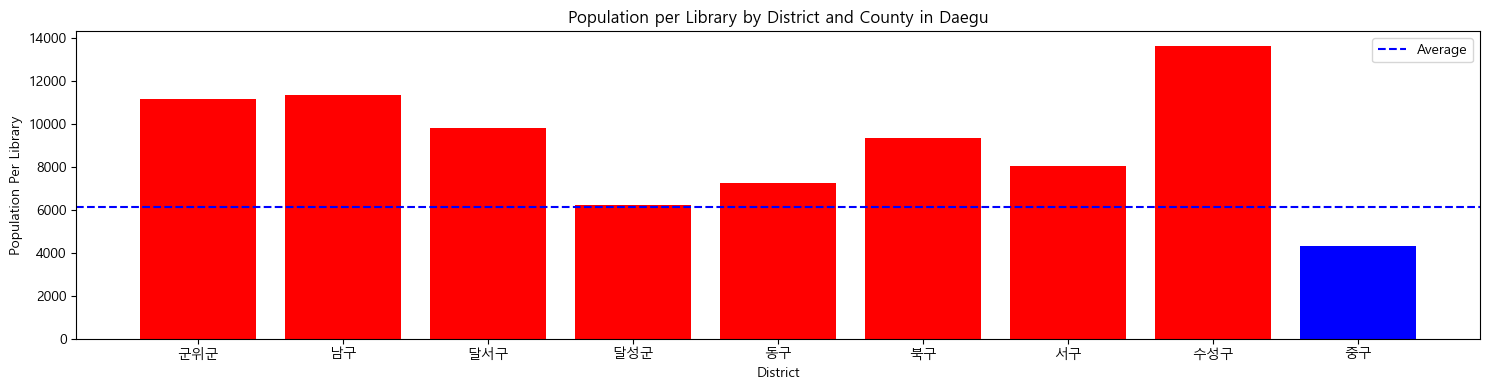

In [6]:
# 대구 막대그래프

daegu = library_population_per_population.loc[library_population_per_population['행정구역'] == '대구']
daegu

plt.figure(figsize = (15,4))

colors = ['red' if v > mean_value else 'blue' for v in daegu['도서관 개당 인구수']]
bars = plt.bar(daegu['시군구'], daegu['도서관 개당 인구수'], color=colors)

plt.axhline(mean_value, color='blue', linestyle='--', label='Average')

plt.title('Population per Library by District and County in Daegu')
plt.xlabel('District')
plt.ylabel('Population Per Library')
plt.legend()
plt.tight_layout()
plt.show()

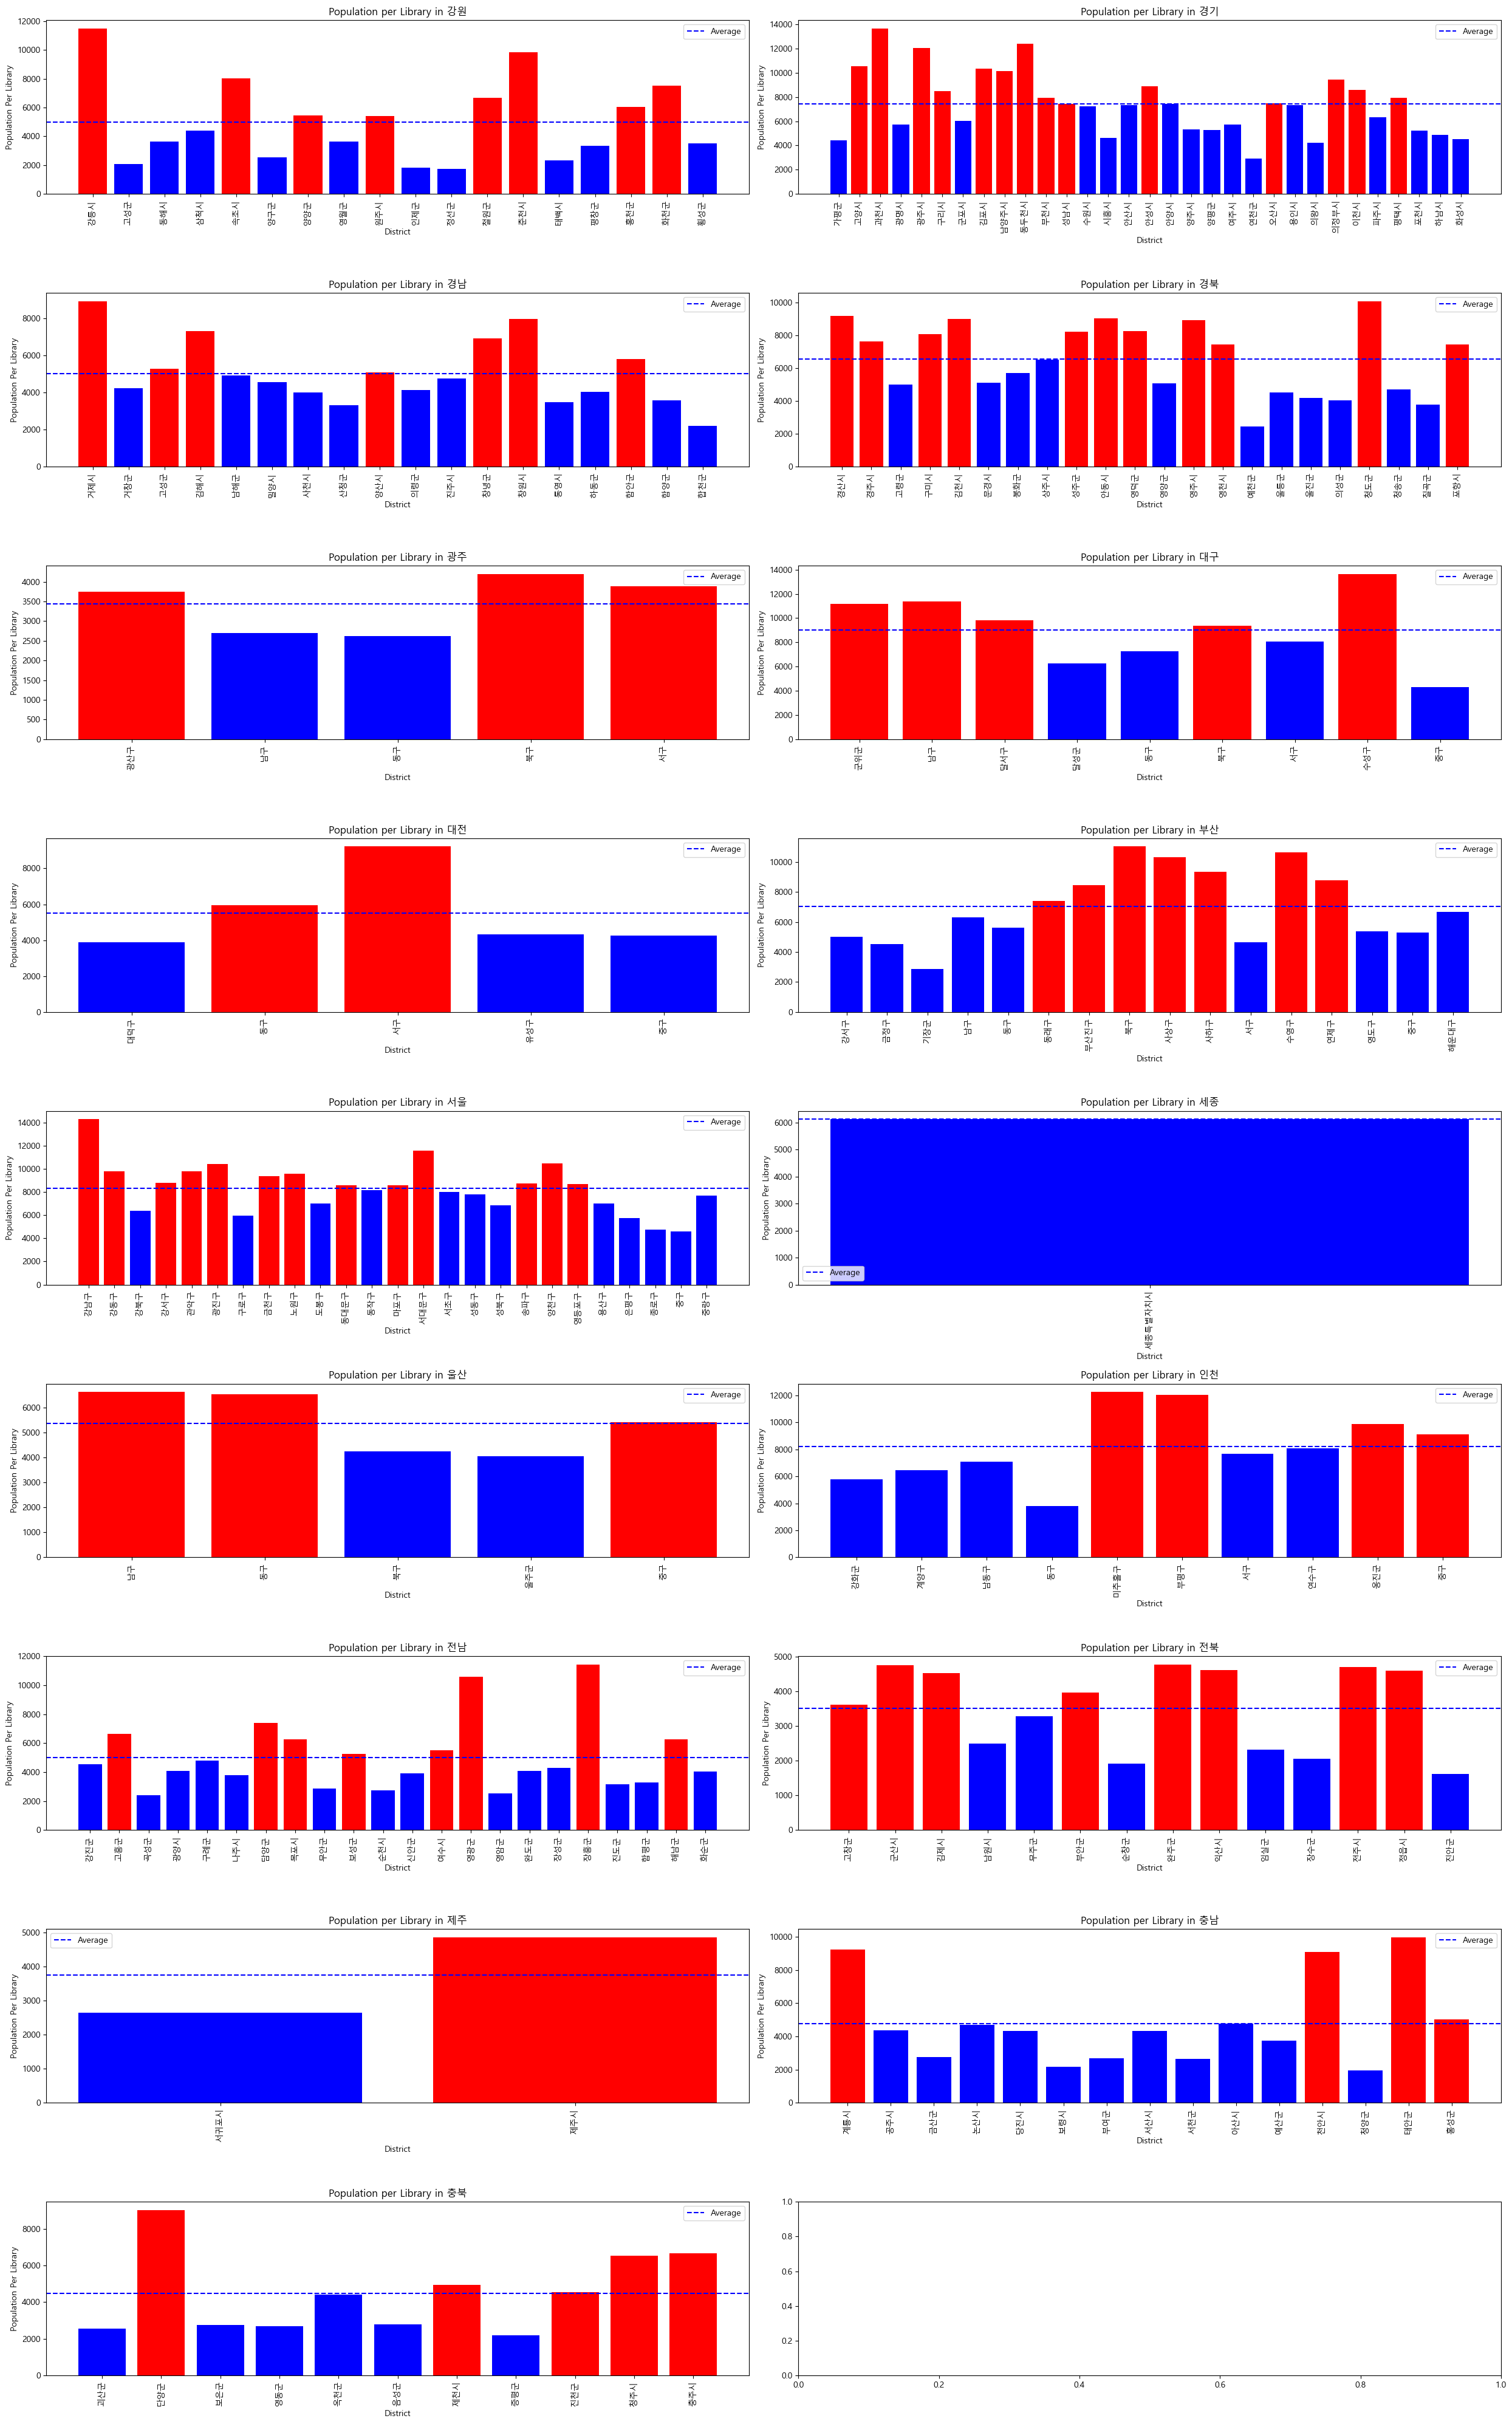

"\nfor i in range(16):\n    df = library_population_per_population[library_population_per_population['행정구역'] == regions[i]]\n    colors = ['red' if v > mean_value else 'blue' for v in df['도서관 개당 인구수']]\n    bars = plt.bar(df['시군구'], df['도서관 개당 인구수'], color=colors)\n\n    plt.axhline(mean_value, color='blue', linestyle='--', label='Average')\n\n    plt.title('Population per Library by District and County in {}'.format(regions[0]))\n    plt.xlabel('District')\n    plt.ylabel('Population Per Library')\n    plt.legend()\n    plt.tight_layout()\n    plt.show()\n"

In [20]:
regions = library_population_per_population['행정구역'].unique() # 17개

fig, axes = plt.subplots(9,2, figsize = (25,40))
axes = axes.flatten()

for i, region in enumerate(regions):
    ax = axes[i]
    df = library_population_per_population[library_population_per_population['행정구역'] == region]
    mean_value = df['도서관 개당 인구수'].mean()  # 지역별 평균
    
    colors = ['red' if v > mean_value else 'blue' for v in df['도서관 개당 인구수']]
    bars = ax.bar(df['시군구'], df['도서관 개당 인구수'], color=colors)
    
    ax.axhline(mean_value, color='blue', linestyle='--', label='Average')
    ax.set_title(f'Population per Library in {region}')
    ax.set_xlabel('District')
    ax.set_ylabel('Population Per Library')
    ax.legend()
    ax.tick_params(axis='x', rotation=90)
    
plt.tight_layout()
plt.show()

"""
for i in range(16):
    df = library_population_per_population[library_population_per_population['행정구역'] == regions[i]]
    colors = ['red' if v > mean_value else 'blue' for v in df['도서관 개당 인구수']]
    bars = plt.bar(df['시군구'], df['도서관 개당 인구수'], color=colors)

    plt.axhline(mean_value, color='blue', linestyle='--', label='Average')

    plt.title('Population per Library by District and County in {}'.format(regions[0]))
    plt.xlabel('District')
    plt.ylabel('Population Per Library')
    plt.legend()
    plt.tight_layout()
    plt.show()
"""


In [26]:
# 장서수 평균 막대그래프

library_population_per_population['명당 장서수'] = library_population_per_population['장서수'] / library_population_per_population['2025년06월_계_총인구수']

library_population_per_population

,행정구역,시군구,도서관수,장서수,2025년06월_계_총인구수,도서관 개당 인구수,명당 장서수
0,강원,강릉시,18,580837,206904.0,11494.666667,2.807278
1,강원,고성군,13,179227,26812.0,2062.461538,6.684582
2,강원,동해시,24,497645,86854.0,3618.916667,5.729673
3,강원,삼척시,14,379608,61311.0,4379.357143,6.191515
4,강원,속초시,10,319419,80101.0,8010.100000,3.987703
...,...,...,...,...,...,...,...
225,충북,제천시,26,754444,128437.0,4939.884615,5.874039
226,충북,증평군,17,172001,37181.0,2187.117647,4.626046
227,충북,진천군,19,341965,85991.0,4525.842105,3.976753
228,충북,청주시,131,2799459,855340.0,6529.312977,3.272920


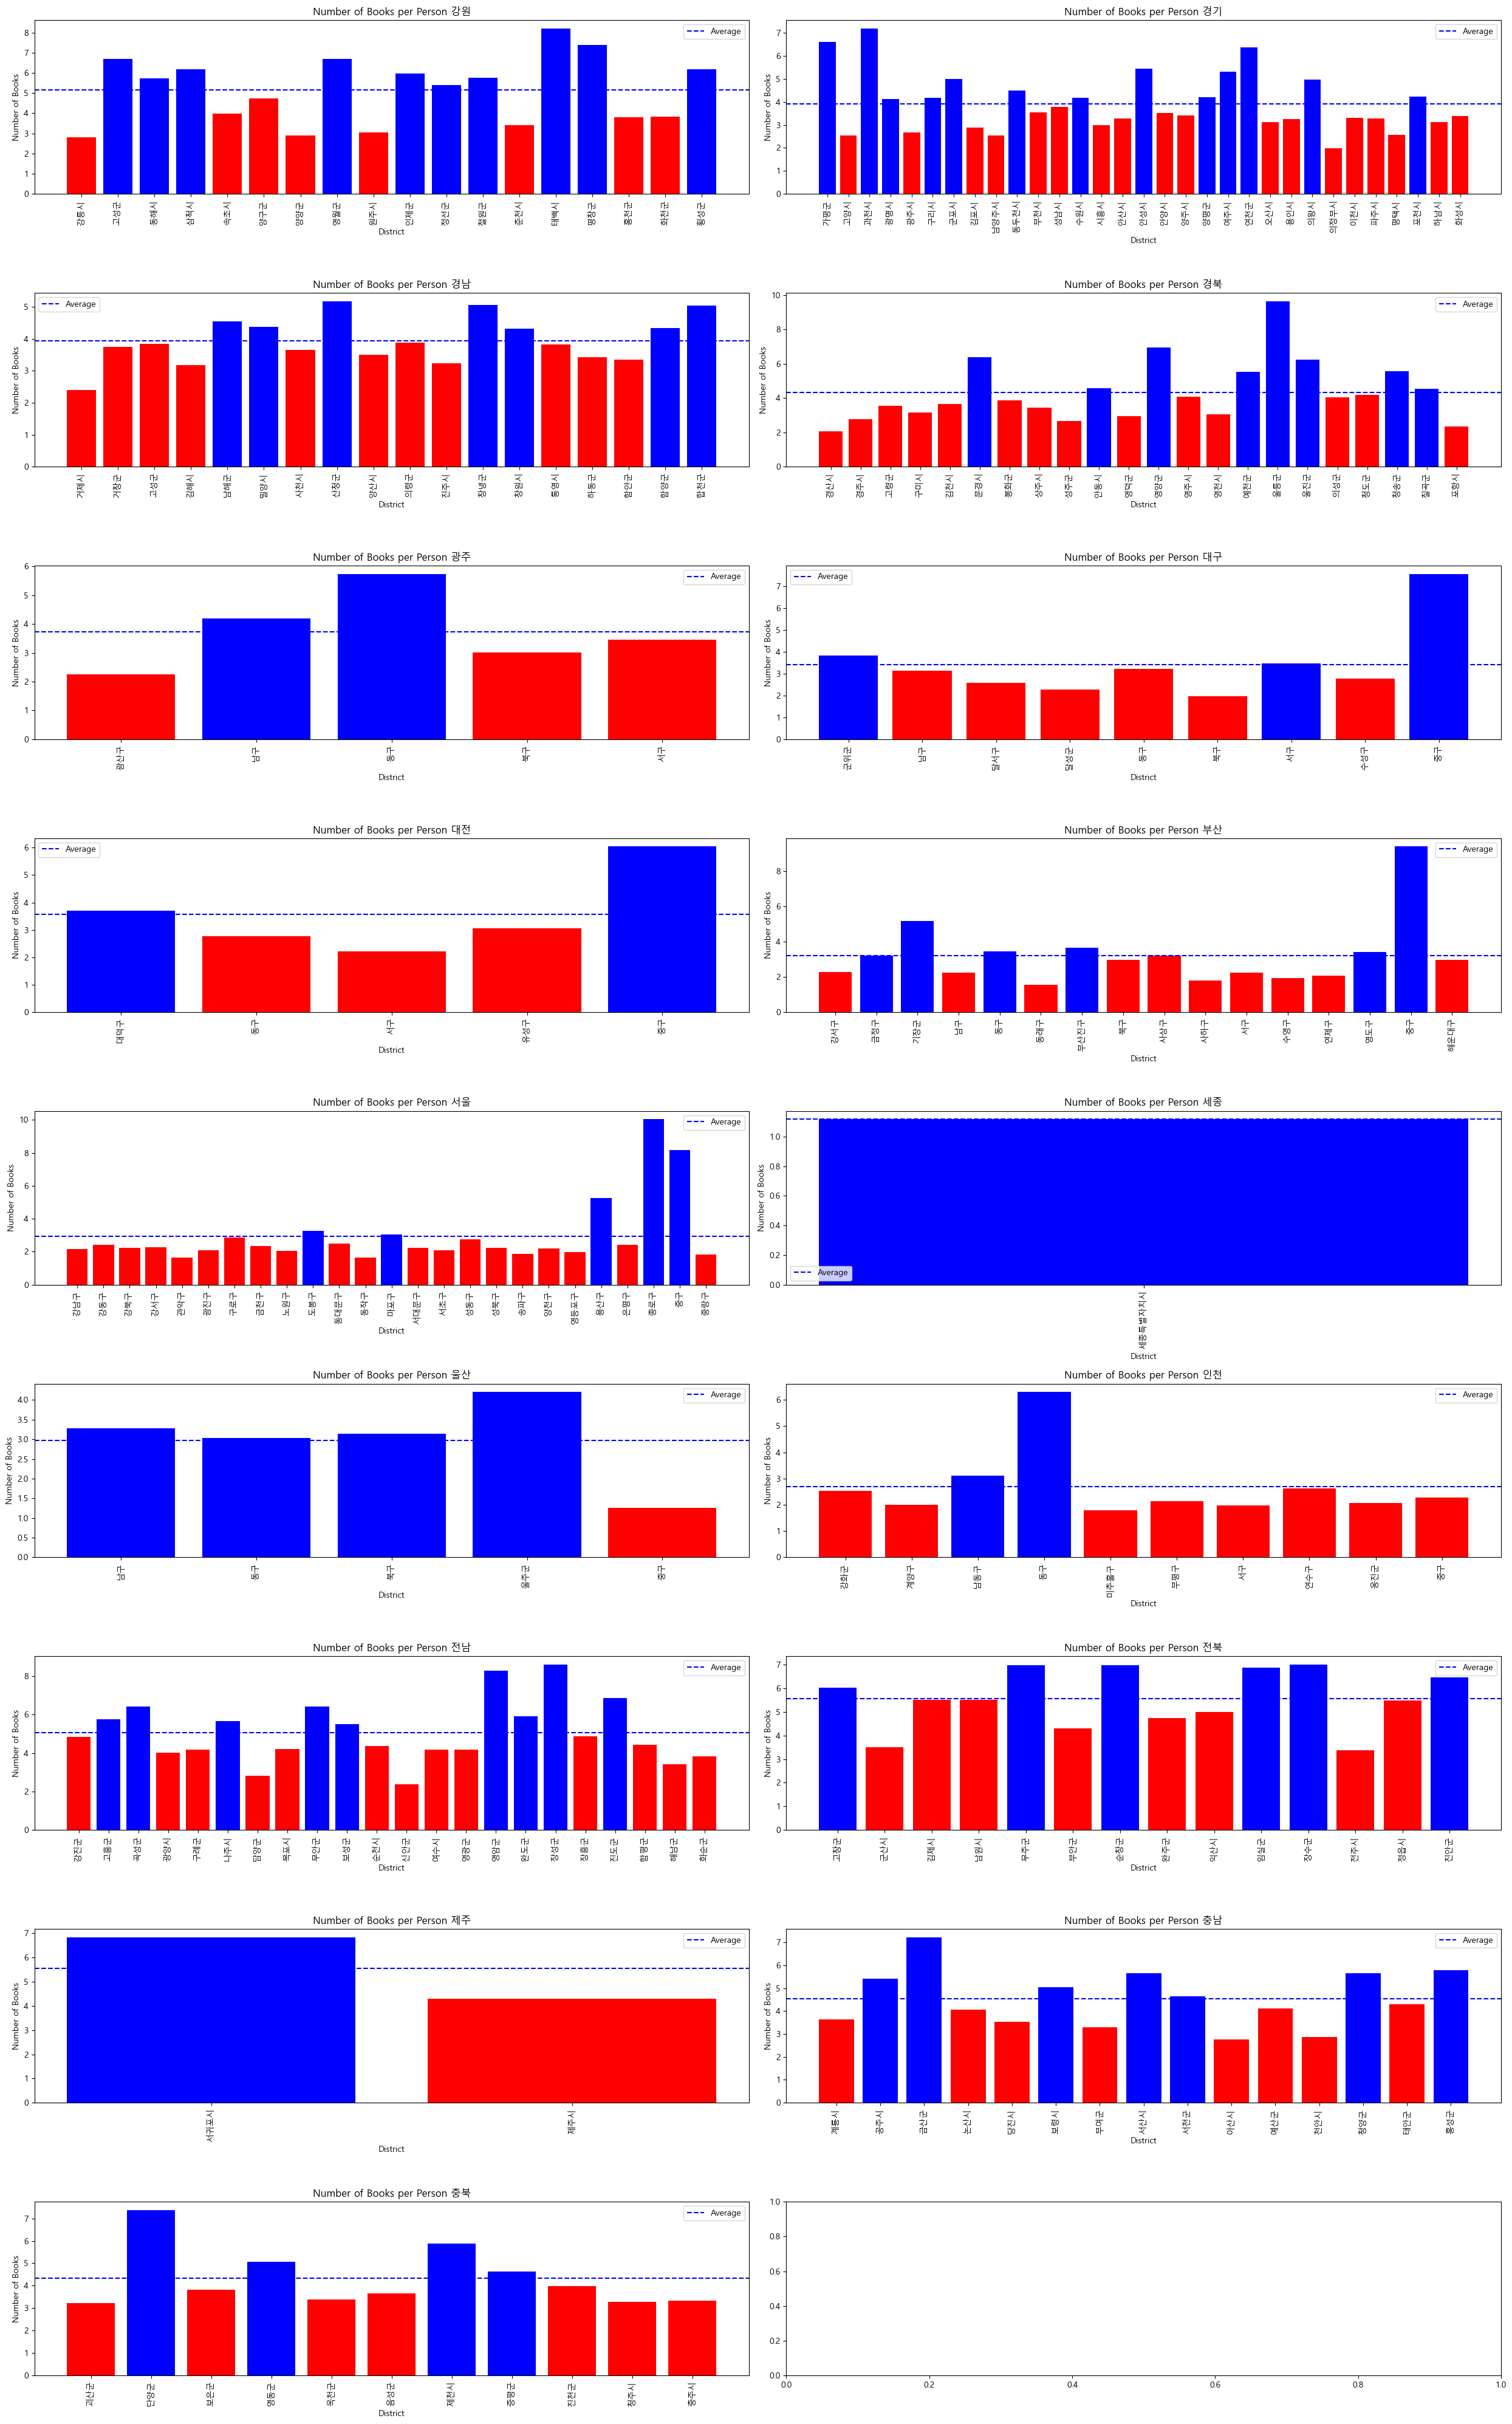

In [28]:
regions = library_population_per_population['행정구역'].unique() # 17개

fig, axes = plt.subplots(9,2, figsize = (25,40))
axes = axes.flatten()

for i, region in enumerate(regions):
    ax = axes[i]
    df = library_population_per_population[library_population_per_population['행정구역'] == region]
    mean_value = df['명당 장서수'].mean()  # 지역별 평균
    
    colors = ['red' if v < mean_value else 'blue' for v in df['명당 장서수']]
    bars = ax.bar(df['시군구'], df['명당 장서수'], color=colors)
    
    ax.axhline(mean_value, color='blue', linestyle='--', label='Average')
    ax.set_title(f'Number of Books per Person {region}')
    ax.set_xlabel('District')
    ax.set_ylabel('Number of Books')
    ax.legend()
    ax.tick_params(axis='x', rotation=90)
    
plt.tight_layout()
plt.show()